In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import sqlite3
from datetime import date
from datetime import datetime as dt
import hashlib
import sys
import os
import locale
import re
import requests as rq
import wbdata as wb
from contextlib import contextmanager
import pytz
from datetime import timedelta
from currency_converter import CurrencyConverter
cc=CurrencyConverter()
from matplotlib import pyplot as plt
from sklearn import preprocessing as prep
import numpy as np

project_dir = '/home/mi/Dropbox/prog/python/tradeDB'
os.chdir(project_dir)

from importlib import reload
#from workers import sql
from workers import api
#from workers.common import read_json, hash_table
import tradeDB

In [29]:
ale= tradeDB.Trader()
pkn= tradeDB.Trader()
wig= tradeDB.Trader()
sp=tradeDB.Trader()


In [33]:
ale.get(tab='stock',symbol='ale', start_date='1-01-2023')
pkn.get(tab='stock',symbol='pkn')
wig.get(tab='indexes',symbol='wig20')
sp.get(tab='indexes', symbol='^spx')

Date range changed to last available data.
Select particular symbol, name, and/or date range if you want different dates.
Date range changed to last available data.
Select particular symbol, name, and/or date range if you want different dates.
Date range changed to last available data.
Select particular symbol, name, and/or date range if you want different dates.


In [34]:
ale+pkn+wig

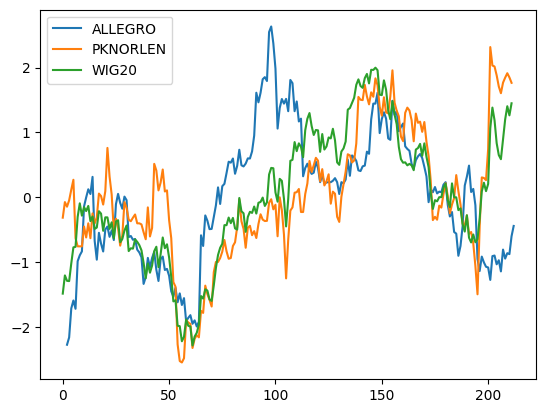

In [35]:
ale.plot(normalize=True)

In [36]:
ale.data

name,ALLEGRO,PKNORLEN,WIG20
date,,,
2022-12-28,NaN,58.5860,1767.88
2022-12-29,NaN,59.3964,1802.20
2022-12-30,25.130,59.1570,1792.01
2023-01-02,25.440,59.4885,1791.47
2023-01-03,26.665,60.0410,1824.82
...,...,...,...
2023-10-25,28.770,65.8700,2096.22
2023-10-26,29.000,66.1000,2120.96
2023-10-27,28.960,65.8800,2103.73


In [27]:
jola=tradeDB.Trader()
jola.get(tab='INDEXES')
print(jola)

Date range changed to last available data.
Select particular symbol, name, and/or date range if you want different dates.
         val        date  symbol                                 name country  \
0    3085.54  2023-10-31    A5.C                                  ATX      AT   
1     718.60  2023-10-31    ^AEX                                  AEX      NL   
2    1193.10  2023-10-31    ^ATH                      ATHEX COMPOSITE      GR   
3    3356.76  2023-10-31  ^BEL20                               BEL 20      BE   
4   14218.42  2023-10-31    ^BET                                  BET      RO   
5   56035.15  2023-10-31    ^BUX                                  BUX      HU   
6    6885.65  2023-10-31    ^CAC                               CAC 40      FR   
7   14810.34  2023-10-31    ^DAX                                  DAX      DE   
8   27741.91  2023-10-31   ^FMIB                             FTSE MIB      IT   
9   17083.05  2023-10-31    ^FTM                             FTSE 25

In [ ]:
ale.get(tab='stock',symbol='ale',columns='name;symbol;val;vol;date', start_date='20-05-2023', currency='usd')
pkn.get(tab='stock',symbol='pkn')
wig.get(tab='index',symbol='wig')
sp.get(tab='indexes', symbol='^spx')
ale+pkn+wig+sp

In [ ]:
ale.plot()

In [ ]:
wig.get(tab='index',symbol='wig', currency='usd',start_date='1-01-2023')
wig+sp

In [ ]:
wig.plot()

In [ ]:
wig.get(tab='index',symbol='wig', start_date='1-01-2023', currency='%')
wig+sp

In [ ]:
wig.plot()

In [ ]:
# print all wig20 stocks
wig20 = tradeDB.Trader()
wig20.get(tab='indexes',symbol='wig20')
wig20_ind=tradeDB.Trader()
wig20_ind.get(tab='stock',components='wig20', columns='symbol')
wig20_sym=(';').join(wig20_ind.data['symbol'])
wig20_st = tradeDB.Trader()
wig20_st.get(tab='stock',symbol=wig20_sym, start_date='1-1-2023')
wig20_st+wig20

In [ ]:
wig20_st.pivot()
wig20_st.data

In [ ]:
wig20_st.plot(normalize=True)